In [55]:
import gensim
# import torch
# import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import pandas as pd
import numpy as np
import scipy as spy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 13

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, f1_score

import joblib
import pickle

In [57]:
reviews_oversampled = pd.read_csv('oneplus_labeled_data_oversampled.csv')

In [58]:
reviews_oversampled.tail()

,lemmatized,Sentiment
5608,camera bad,Negative
5609,camera stop work month fast charging isn t wor...,Negative
5610,set clone app whatsapp doneclone whatsapp pr k...,Negative
5611,phone lag 22 storage,Negative
5612,bhai koi bhi plus nord 2 ko mt lena bahut jyad...,Negative


In [59]:
reviews_oversampled.describe()

,lemmatized,Sentiment
count,5602,5613
unique,4687,3
top,good product,Positive
freq,12,2024


In [60]:
reviews_oversampled.isnull().sum()

lemmatized    11
Sentiment      0
dtype: int64

In [61]:
reviews_oversampled.dropna(inplace= True)
reviews_oversampled.reset_index(inplace = True)
reviews_oversampled.drop('index', axis = 1, inplace = True)

In [62]:
reviews_oversampled.isnull().sum()

lemmatized    0
Sentiment     0
dtype: int64

In [63]:
reviews_oversampled.tail()

,lemmatized,Sentiment
5597,camera bad,Negative
5598,camera stop work month fast charging isn t wor...,Negative
5599,set clone app whatsapp doneclone whatsapp pr k...,Negative
5600,phone lag 22 storage,Negative
5601,bhai koi bhi plus nord 2 ko mt lena bahut jyad...,Negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

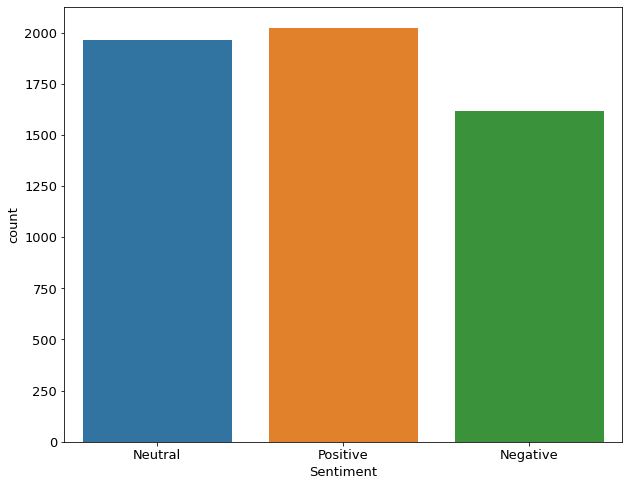

In [64]:
sns.countplot(x = reviews_oversampled['Sentiment'])

In [65]:
reviews_oversampled.duplicated().sum()

915

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

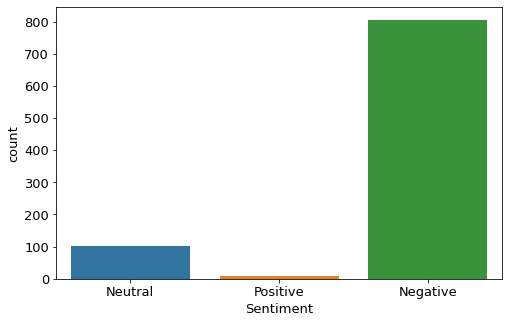

In [66]:
plt.figure(figsize= (8,5))
sns.countplot(x= reviews_oversampled['Sentiment'][reviews_oversampled.duplicated()])

In [67]:
reviews_oversampled_1 = reviews_oversampled.copy()

In [68]:
def encoding_labels(dataframe, column_name):
    unique_labels = list(dataframe[column_name].unique())
    unique_labels.sort()
    encode_dict = dict(zip(unique_labels, range(len(unique_labels))))
    dataframe[column_name] = dataframe[column_name].map(encode_dict)
    return encode_dict

In [69]:
#label_encode_dict = encoding_labels(reviews_oversampled_1, 'Sentiment')
#label_encode_dict

In [70]:
reviews_oversampled_1.iloc[500:520,:]

,lemmatized,Sentiment
500,phone good switch pixel 2 experience clean ove...,Positive
501,write review 48 hour usage plus device extensi...,Positive
502,bad product disappointed dial receive mobile b...,Negative
503,s near perfect phone use like 90 people use da...,Neutral
504,camera vivo v 21 se good hai charger bahut hi ...,Neutral
505,oneplus mobile confused decision buy finally d...,Positive
506,device allrounder tick box like 1 design good ...,Positive
507,record feature inform party big negative play ...,Neutral
508,bad product segmentplz guy don t buy s persona...,Negative
509,heating issue mobile reach 47 c play bgmi heat...,Negative


In [71]:
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(reviews_oversampled_1['lemmatized'], 
        reviews_oversampled_1['Sentiment'], test_size = 0.2, random_state= 15 )
x_train_over, x_val_over, y_train_over, y_val_over = train_test_split(x_train_over, y_train_over, test_size=0.25, random_state= 15)

In [72]:
x_train_over.shape, x_test_over.shape, x_val_over.shape

((3360,), (1121,), (1121,))

In [73]:
y_train_over.value_counts(), y_test_over.value_counts(), y_val_over.value_counts()

(Positive    1222
 Neutral     1188
 Negative     950
 Name: Sentiment, dtype: int64,
 Positive    417
 Neutral     388
 Negative    316
 Name: Sentiment, dtype: int64,
 Neutral     387
 Positive    385
 Negative    349
 Name: Sentiment, dtype: int64)

In [74]:
pipe_lr  = make_pipeline(CountVectorizer(), LogisticRegression(C = 0.5, max_iter= 500, tol = 0.001 ))
pipe_lr.fit(x_train_over, y_train_over)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=0.5, max_iter=500, tol=0.001))])

In [75]:
pipe_lr

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=0.5, max_iter=500, tol=0.001))])

In [76]:
pipe_lr.score(x_test_over,y_test_over)

0.8537020517395183

In [77]:
ex1 = 'This product is amazing'
pipe_lr.predict([ex1])

array(['Neutral'], dtype=object)

In [78]:
pipe_lr.predict_proba([ex1])

array([[0.1403586 , 0.56605249, 0.2935889 ]])

In [79]:
pipe_lr.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [80]:
import joblib 
pipeline_file = open("model_amazon_review.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()